In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

## 简介

In [2]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [4]:
multinomial.Multinomial(10, fair_probs).sample((10, ))

tensor([[4., 3., 1., 2., 0., 0.],
        [0., 1., 1., 1., 3., 4.],
        [1., 2., 4., 1., 0., 2.],
        [3., 0., 3., 3., 0., 1.],
        [4., 0., 3., 0., 1., 2.],
        [0., 3., 3., 2., 2., 0.],
        [1., 3., 1., 3., 0., 2.],
        [0., 2., 4., 2., 0., 2.],
        [4., 1., 2., 1., 0., 2.],
        [0., 1., 1., 3., 1., 4.]])

In [5]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1660, 0.1710, 0.1740, 0.1630, 0.1780, 0.1480])

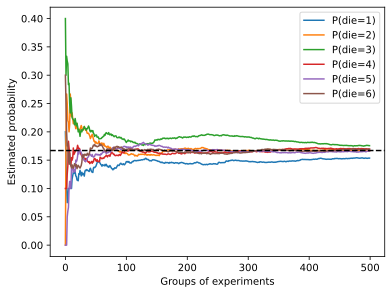

In [ ]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

In [11]:
#estimates[:,1]